In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
df = pd.read_csv("Avm_Musterileri.csv")
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


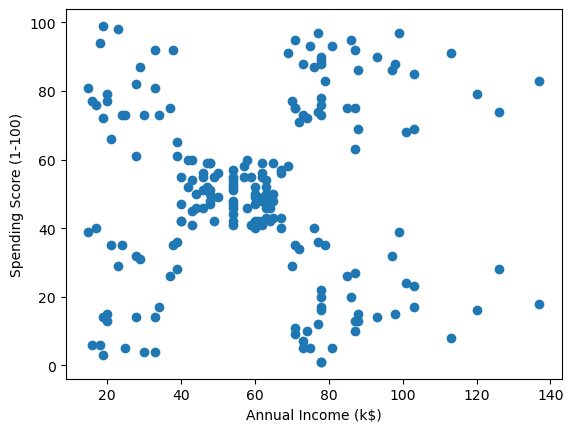

In [2]:
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"])
plt.xlabel("Annual Income (k$)")
plt.ylabel('Spending Score (1-100)')
plt.show()

In [3]:
#sütun isimlerini kısaltma
df.rename(columns = {"Annual Income (k$)" : "income"}, inplace = True) #true df i değiştirir false olsaydı yeni bir df oluştururdu ve sol tarafta yeni bir df e eşitlemek gerekirdi.
df.rename(columns = {"Spending Score (1-100)" : "score"}, inplace = True)

In [4]:
scaler = MinMaxScaler()  # verileri normalize eder
scaler.fit(df[["income"]])
df["income"] = scaler.transform(df[["income"]])

scaler.fit(df[["score"]])
df["score"] = scaler.transform(df[["score"]])

df.head()

,CustomerID,income,score
0,1,0.000000,0.387755
1,2,0.000000,0.816327
2,3,0.008197,0.051020
3,4,0.008197,0.775510
4,5,0.016393,0.397959


## K değerini belirleme

In [5]:
k_range = range(1,11)

list_dist = []

for k in k_range:
    kmeans_modelim = KMeans(n_clusters = k)
    kmeans_modelim.fit(df[["income", "score"]])
    list_dist.append(kmeans_modelim.inertia_)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


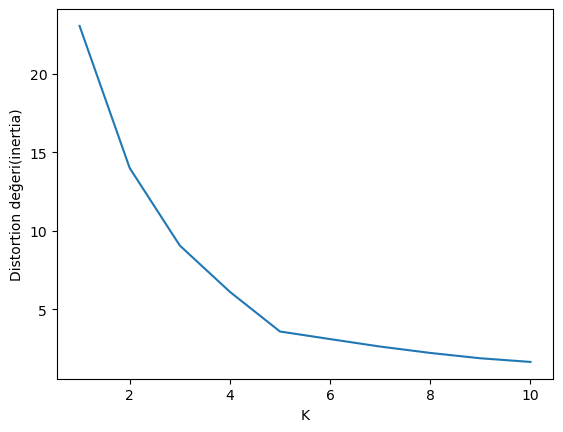

In [6]:
plt.xlabel("K")
plt.ylabel("Distortion değeri(inertia)")
plt.plot(k_range,list_dist)
plt.show()

In [7]:
#en iyi k değeri = 5

In [8]:
# k = 5 için k means modeli oluşturalım
kmeans_modelim = KMeans(n_clusters = 5)
y_predicted = kmeans_modelim.fit_predict(df[["income", "score"]])
y_predicted

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [9]:
df["cluster"] = y_predicted
df.head()

,CustomerID,income,score,cluster
0,1,0.000000,0.387755,0
1,2,0.000000,0.816327,4
2,3,0.008197,0.051020,0
3,4,0.008197,0.775510,4
4,5,0.016393,0.397959,0


In [10]:
#centroidler:
kmeans_modelim.cluster_centers_

array([[0.09265859, 0.20319432],
       [0.33029751, 0.49508692],
       [0.58638083, 0.82783883],
       [0.6       , 0.16443149],
       [0.08792846, 0.79962894]])

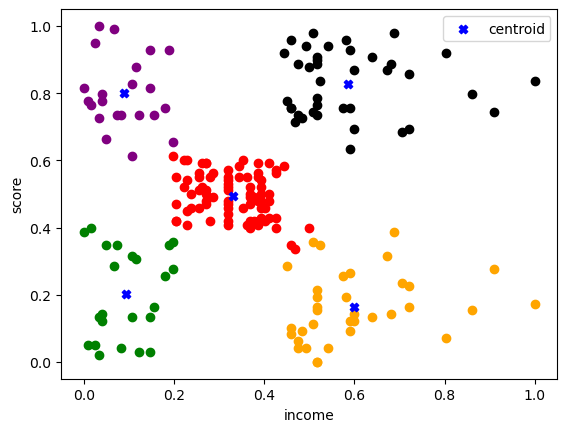

In [13]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
df4 = df[df.cluster == 3]
df5 = df[df.cluster == 4]
plt.xlabel("income")
plt.ylabel("score")
plt.scatter(df1.income, df1.score, color ="g")
plt.scatter(df2.income, df2.score, color ="r")
plt.scatter(df3.income, df3.score, color ="black")
plt.scatter(df4.income, df4.score, color ="orange")
plt.scatter(df5.income, df5.score, color ="purple")

plt.scatter(kmeans_modelim.cluster_centers_[:,0], kmeans_modelim.cluster_centers_[:,1], color = "blue", marker ="X", label ="centroid")
plt.legend()
plt.show()